In [20]:
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']

# Basics + EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 8

Populating the interactive namespace from numpy and matplotlib


In [21]:
poets_df = pd.read_csv('poets_clean.csv')
poets_df.head(3)

,token_id,num_sales,image_url,image_original_url,name,description,permalink,creator,traits,owner_username,owner_address
0,1,0,https://lh3.googleusercontent.com/ulT6Iu_7798l...,https://d1xxei964ioe0z.cloudfront.net/full/a16...,I,No Description Yet,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Named', 'value': 'True', 'dis...",pak,0x2ce780d7c743a57791b835a9d6f998b15bbba5a4
1,2,0,https://lh3.googleusercontent.com/gtvCMMER8xEL...,https://d1xxei964ioe0z.cloudfront.net/full/622...,Origin #7THK,No Description Yet,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Origin', 'value': '7THK', 'di...",NaN,0x984de65b9f9499dfb166889f0e9e15f6d779a1a7
2,3,0,https://lh3.googleusercontent.com/xgxBi9sL8ZOT...,https://d1xxei964ioe0z.cloudfront.net/full/304...,Origin #6AF2,No Description Yet,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Origin', 'value': '6AF2', 'di...",LordTruffington_Vault,0x247c87f0705a82fc75811d04d01a5a22f736bbb3


In [22]:
poets_df.iloc[0]

token_id                                                              1
num_sales                                                             0
image_url             https://lh3.googleusercontent.com/ulT6Iu_7798l...
image_original_url    https://d1xxei964ioe0z.cloudfront.net/full/a16...
name                                                                  I
description                                          No Description Yet
permalink             https://opensea.io/assets/0x4b3406a41399c7fd2b...
creator                                                             NaN
traits                [{'trait_type': 'Named', 'value': 'True', 'dis...
owner_username                                                      pak
owner_address                0x2ce780d7c743a57791b835a9d6f998b15bbba5a4
Name: 0, dtype: object

In [23]:
sold_poets = poets_df[poets_df.num_sales != 0]
sold_poets.head(3)

,token_id,num_sales,image_url,image_original_url,name,description,permalink,creator,traits,owner_username,owner_address
3,4,1,https://lh3.googleusercontent.com/KHWZ4GF4GOIU...,https://d1xxei964ioe0z.cloudfront.net/full/073...,BOND,No Description Yet,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Class', 'value': 'Origin', 'd...",TopHand,0x3b3d5008e09451935500f140369c21c779707470
30,31,1,https://lh3.googleusercontent.com/Tj44Eh9grNW-...,https://d1xxei964ioe0z.cloudfront.net/full/1e7...,Origin #8WI4,origin born into happiness\n\npatiently waitin...,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Word', 'value': 'can', 'displ...",GAMT,0xcf1ce1496f4367f700e440f4707ad6fea8df1e23
37,38,1,https://lh3.googleusercontent.com/SSiWWa0qau1V...,https://d1xxei964ioe0z.cloudfront.net/full/0c9...,Origin #G31Y,No Description Yet,https://opensea.io/assets/0x4b3406a41399c7fd2b...,NaN,"[{'trait_type': 'Origin', 'value': 'G31Y', 'di...",mexpex,0xf3bfe0bb0dab720ea251dde573fe1d16c9145e1e


In [24]:
sold_poets.owner_username.nunique()

634

In [25]:
assets_by_owner = sold_poets.owner_username.value_counts()
assets_by_owner

nifty-gateway-omnibus    191
unknown owner            143
mexpex                    79
randaartcollect1          77
head-trip                 46
                        ... 
encapsuled_vault           1
GoldDragon                 1
drjazz                     1
_Ski                       1
kainar                     1
Name: owner_username, Length: 634, dtype: int64

In [26]:
top_owners = assets_by_owner[assets_by_owner>10].to_frame().reset_index()
top_owners

,index,owner_username
0,nifty-gateway-omnibus,191
1,unknown owner,143
2,mexpex,79
3,randaartcollect1,77
4,head-trip,46
5,HalfLifeXxVault,29
6,ELCAPITAN,27
7,ModeratsArt,26
8,oxgbed,25
9,Pascal_,21


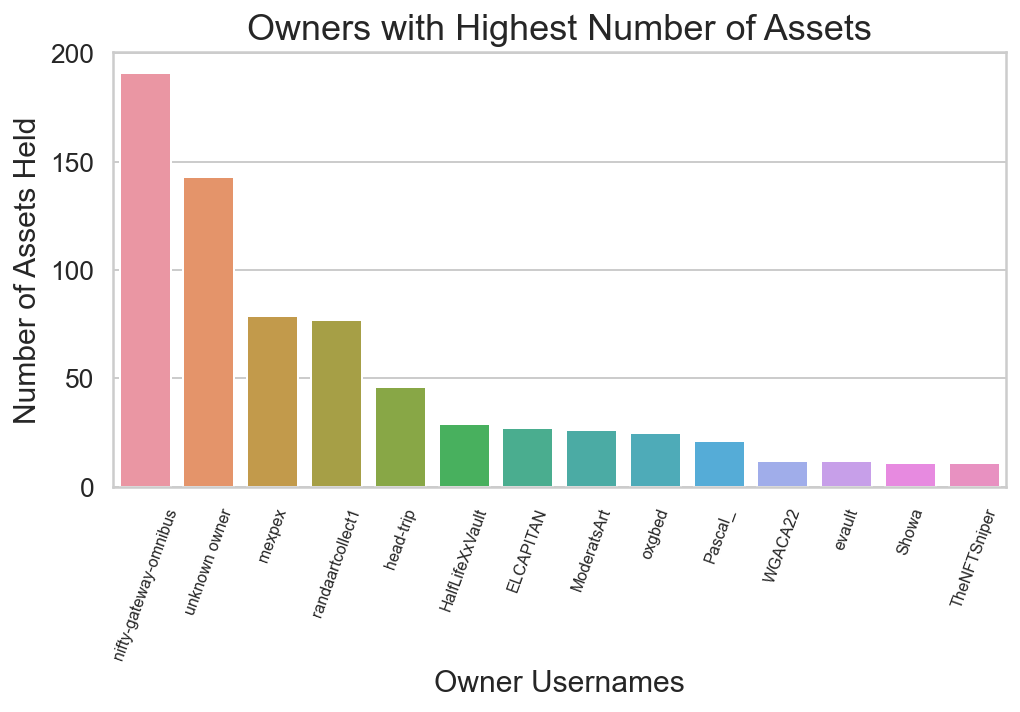

In [27]:
sns.barplot(x = 'index', y = 'owner_username', 
             data = top_owners, 
             order = top_owners['index'])
plt.xlabel("Owner Usernames", size=15)
plt.xticks(rotation=70)
plt.ylabel("Number of Assets Held", size=15)
plt.title("Owners with Highest Number of Assets", size=18)
plt.savefig("Top Asset Owners.png", bbox_inches='tight', dpi=250)